load the dataset from drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd '/content/gdrive/My Drive/dataset/archive.zip (Unzipped Files)'

Mounted at /content/gdrive/
/content/gdrive/My Drive/dataset/archive.zip (Unzipped Files)


import necessery libraries

In [2]:
from builtins import range
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

dataset pat

In [3]:
train_dir = 'train'
valid_dir = 'valid'
test_dir = 'test'

generating and preparing the dataset for model

In [4]:
image_gen = ImageDataGenerator()
train_data_gen = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2)
train_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode ='categorical',
    shuffle = True
)
valid_data = image_gen.flow_from_directory(
    valid_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode ='categorical',
    shuffle = False
)
test_data = image_gen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode ='categorical',
    shuffle = False
)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


adding classes into a dictionary

In [5]:
labels = train_data.class_indices
class_mapping = dict((v,k) for k,v in labels.items())
class_mapping

{0: 'Afghan',
 1: 'African Wild Dog',
 2: 'Airedale',
 3: 'American Hairless',
 4: 'American Spaniel',
 5: 'Basenji',
 6: 'Basset',
 7: 'Beagle',
 8: 'Bearded Collie',
 9: 'Bermaise',
 10: 'Bichon Frise',
 11: 'Blenheim',
 12: 'Bloodhound',
 13: 'Bluetick',
 14: 'Border Collie',
 15: 'Borzoi',
 16: 'Boston Terrier',
 17: 'Boxer',
 18: 'Bull Mastiff',
 19: 'Bull Terrier',
 20: 'Bulldog',
 21: 'Cairn',
 22: 'Chihuahua',
 23: 'Chinese Crested',
 24: 'Chow',
 25: 'Clumber',
 26: 'Cockapoo',
 27: 'Cocker',
 28: 'Collie',
 29: 'Corgi',
 30: 'Coyote',
 31: 'Dalmation',
 32: 'Dhole',
 33: 'Dingo',
 34: 'Doberman',
 35: 'Elk Hound',
 36: 'French Bulldog',
 37: 'German Sheperd',
 38: 'Golden Retriever',
 39: 'Great Dane',
 40: 'Great Perenees',
 41: 'Greyhound',
 42: 'Groenendael',
 43: 'Irish Spaniel',
 44: 'Irish Wolfhound',
 45: 'Japanese Spaniel',
 46: 'Komondor',
 47: 'Labradoodle',
 48: 'Labrador',
 49: 'Lhasa',
 50: 'Malinois',
 51: 'Maltese',
 52: 'Mex Hairless',
 53: 'Newfoundland',
 54

our cnn model (resnet50)

In [6]:
resnetModel = tf.keras.applications.resnet50.ResNet50(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = resnetModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.2)(outputs)
outputs = Dense(70, activation="softmax")(outputs)

model = Model(inputs=resnetModel.input, outputs=outputs)

94765736/94765736 [==============================] - 3s 0us/step


COMPILING THE MODEL

In [7]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

build and summarization

In [8]:
model.build(((None, 224, 224, 3)))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

fit model on the train and validation dataset

In [10]:
train_cb = ModelCheckpoint('./model/', save_best_only = True)
history = model.fit(train_data, validation_data = valid_data, callbacks = [train_cb], epochs = 20, batch_size = 32)

Epoch 1/20
249/249 [==============================] - ETA: 0s - loss: 4.0300 - accuracy: 0.1943 

249/249 [==============================] - 3737s 15s/step - loss: 4.0300 - accuracy: 0.1943 - val_loss: 1.5438 - val_accuracy: 0.5771
Epoch 2/20
249/249 [==============================] - ETA: 0s - loss: 1.7000 - accuracy: 0.5337

249/249 [==============================] - 177s 709ms/step - loss: 1.7000 - accuracy: 0.5337 - val_loss: 0.9166 - val_accuracy: 0.7786
Epoch 3/20
249/249 [==============================] - ETA: 0s - loss: 1.0674 - accuracy: 0.6904

249/249 [==============================] - 175s 702ms/step - loss: 1.0674 - accuracy: 0.6904 - val_loss: 0.7644 - val_accuracy: 0.8386
Epoch 4/20
249/249 [==============================] - ETA: 0s - loss: 0.7970 - accuracy: 0.7653

249/249 [==============================] - 175s 700ms/step - loss: 0.7970 - accuracy: 0.7653 - val_loss: 0.6985 - val_accuracy: 0.8671
Epoch 5/20
249/249 [==============================] - ETA: 0s - loss: 0.6343 - accuracy: 0.8068

249/249 [==============================] - 174s 698ms/step - loss: 0.6343 - accuracy: 0.8068 - val_loss: 0.6797 - val_accuracy: 0.8829
Epoch 6/20
249/249 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.8481

249/249 [==============================] - 170s 682ms/step - loss: 0.5077 - accuracy: 0.8481 - val_loss: 0.6760 - val_accuracy: 0.8886
Epoch 7/20
249/249 [==============================] - 140s 562ms/step - loss: 0.4225 - accuracy: 0.8706 - val_loss: 0.6765 - val_accuracy: 0.8900
Epoch 8/20
249/249 [==============================] - 139s 559ms/step - loss: 0.3676 - accuracy: 0.8852 - val_loss: 0.6761 - val_accuracy: 0.8971
Epoch 9/20
249/249 [==============================] - ETA: 0s - loss: 0.3170 - accuracy: 0.8982

249/249 [==============================] - 166s 665ms/step - loss: 0.3170 - accuracy: 0.8982 - val_loss: 0.6570 - val_accuracy: 0.8986
Epoch 10/20
249/249 [==============================] - ETA: 0s - loss: 0.2731 - accuracy: 0.9134

249/249 [==============================] - 167s 672ms/step - loss: 0.2731 - accuracy: 0.9134 - val_loss: 0.6420 - val_accuracy: 0.9157
Epoch 11/20
249/249 [==============================] - 140s 560ms/step - loss: 0.2403 - accuracy: 0.9198 - val_loss: 0.6515 - val_accuracy: 0.9129
Epoch 12/20
249/249 [==============================] - 137s 550ms/step - loss: 0.2333 - accuracy: 0.9252 - val_loss: 0.6647 - val_accuracy: 0.9100
Epoch 13/20
249/249 [==============================] - 138s 554ms/step - loss: 0.1886 - accuracy: 0.9346 - val_loss: 0.6759 - val_accuracy: 0.9229
Epoch 14/20
249/249 [==============================] - 138s 554ms/step - loss: 0.1615 - accuracy: 0.9456 - val_loss: 0.6946 - val_accuracy: 0.9157
Epoch 15/20
249/249 [==============================] - 141s 565ms/step - loss: 0.1464 - accuracy: 0.9498 - val_loss: 0.6692 - val_accuracy: 0.9171
Epoch 16/20
249/249 [==============================] - 138s 553ms/step - loss: 0.1485 - accuracy: 0.9500 - val_loss: 0.6898 - val_

prediction

In [11]:
batch_size = 32
y_pred = model.predict(test_data, batch_size=batch_size)

22/22 [==============================] - 285s 14s/step


saving model

In [15]:
tf.keras.models.save_model(model, "model.h5")

plot the accuracy an val_accuracy against epochs

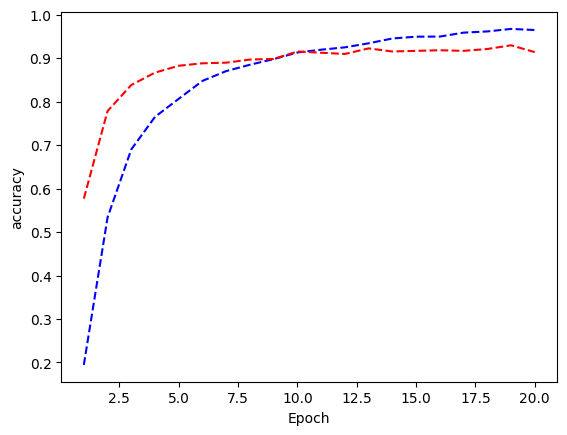

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(val_accuracy) + 1)

plt.plot(epoch_count, accuracy, 'b--')
plt.plot(epoch_count, val_accuracy, 'r--')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();